# **ЗАГРУЗКА_ДАННЫХ**

______________________________________________________________________

# **НАЧАЛО:**

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import os
import pandas as pd
import numpy as np
from pandas import read_csv
from sklearn.model_selection import KFold # делит выборку на фолды
from sklearn.model_selection import cross_val_score # кросс валидация,
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

In [ ]:
os.chdir('/content/gdrive/MyDrive/Colab Notebooks/наборы данных')

In [ ]:
df=read_csv('Metro_Interstate_Traffic_Volume.csv')

In [ ]:
df.head(4)

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026


# **КОНЕЦ.**

_____________________________________________________________________________

# **ОБРАБОТКА_ДАННЫХ**

# **НАЧАЛО:**

In [ ]:
df.date_time = pd.to_datetime(df.date_time) # перевод столбца в datetime

In [ ]:
df.weather_main = pd.Categorical(df.weather_main).codes.astype('int')

In [ ]:
df.weather_description = pd.Categorical(df.weather_description).codes.astype('int')

In [ ]:
df['hour'] = df.date_time.dt.hour #делаем столбец с часами

In [ ]:
df['month'] = df.date_time.dt.month #делаем столбец с месяцами

In [ ]:
df.drop(['holiday'],axis=1,inplace=True)

In [ ]:
#df.drop(['holiday','rain_1h','snow_1h'],axis=1,inplace=True)

In [ ]:
df = df.reindex(columns=['temp',	'clouds_all',	'rain_1h', 'snow_1h', 'weather_main',	'weather_description',	'month',	'hour', 'traffic_volume',	'date_time'])

In [ ]:
df.dtypes

temp                          float64
clouds_all                      int64
rain_1h                       float64
snow_1h                       float64
weather_main                    int64
weather_description             int64
month                           int64
hour                            int64
traffic_volume                  int64
date_time              datetime64[ns]
dtype: object

In [ ]:
df.tail(4)

,temp,clouds_all,rain_1h,snow_1h,weather_main,weather_description,month,hour,traffic_volume,date_time
48200,282.76,90,0.0,0.0,1,19,9,20,2781,2018-09-30 20:00:00
48201,282.73,90,0.0,0.0,10,21,9,21,2159,2018-09-30 21:00:00
48202,282.09,90,0.0,0.0,1,19,9,22,1450,2018-09-30 22:00:00
48203,282.12,90,0.0,0.0,1,19,9,23,954,2018-09-30 23:00:00


In [ ]:
df.to_csv('metro_trffic_очищен.csv')

# **КОНЕЦ.**

_______________________________________________

In [ ]:
df.traffic_volume.mean() # среднее

3259.8183553232097

In [ ]:
print(df.var()['traffic_volume']) # дисперсия

3947615.3237665403


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


In [ ]:
df.traffic_volume.hist()

_________________________________________

# **ОБУЧЕНИЕ**

# **НАЧАЛО:**

In [ ]:
df.shape

(48204, 10)

In [ ]:
array = df.iloc[:,:9].values

In [ ]:
array

array([[ 288.28,   40.  ,    0.  , ...,   10.  ,    9.  , 5545.  ],
       [ 289.36,   75.  ,    0.  , ...,   10.  ,   10.  , 4516.  ],
       [ 289.58,   90.  ,    0.  , ...,   10.  ,   11.  , 4767.  ],
       ...,
       [ 282.73,   90.  ,    0.  , ...,    9.  ,   21.  , 2159.  ],
       [ 282.09,   90.  ,    0.  , ...,    9.  ,   22.  , 1450.  ],
       [ 282.12,   90.  ,    0.  , ...,    9.  ,   23.  ,  954.  ]])

In [ ]:
X=array[:,0:8]
Y=array[:,8]

In [ ]:
X

array([[288.28,  40.  ,   0.  , ...,  24.  ,  10.  ,   9.  ],
       [289.36,  75.  ,   0.  , ...,   2.  ,  10.  ,  10.  ],
       [289.58,  90.  ,   0.  , ...,  19.  ,  10.  ,  11.  ],
       ...,
       [282.73,  90.  ,   0.  , ...,  21.  ,   9.  ,  21.  ],
       [282.09,  90.  ,   0.  , ...,  19.  ,   9.  ,  22.  ],
       [282.12,  90.  ,   0.  , ...,  19.  ,   9.  ,  23.  ]])

In [ ]:
Y

array([5545., 4516., 4767., ..., 2159., 1450.,  954.])

In [ ]:
df.dtypes

temp                          float64
clouds_all                      int64
rain_1h                       float64
snow_1h                       float64
weather_main                    int64
weather_description             int64
month                           int64
hour                            int64
traffic_volume                  int64
date_time              datetime64[ns]
dtype: object

In [ ]:
df_date_time = df[['date_time','traffic_volume']].set_index('date_time')
df_date_time

NameError: ignored

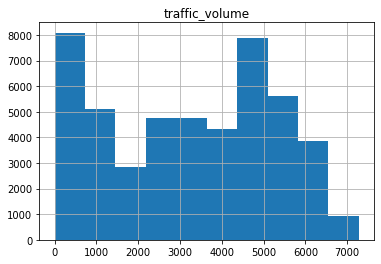

In [ ]:
df_date_time.hist() # ubisoft
plt.show()

Линейная регрессия

In [ ]:
kfold=KFold(n_splits= 3, random_state = 7, shuffle=True)

In [ ]:
scoring = 'neg_mean_squared_error' # название метрики качества, которую Вы будете использовать для оценки качества моделей
                                   # (здесь средняя квадратичная оценка, взятая с отрицательным знаком)

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [ ]:
model=LinearRegression()

In [ ]:
results=cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
                  # model - способ обработки данных (линейная регрессия)
                  # cv=kfold - на сколько частей (фолдов) разбита обучающая выборка
                  # scoring - метод оценки ошибки

In [ ]:
results.mean() # чем меньше, тем лучше

-7181277.08281551

In [ ]:
results.std() # чем меньше, тем лучше

5355236.910801108

# **Гребневая регрессия**

In [ ]:
model=Ridge()

In [ ]:
results=cross_val_score(model, X, Y, cv=kfold, scoring=scoring)

In [ ]:
results.mean() # чем меньше, тем лучше

-7181040.907412779

In [ ]:
results.std() # чем меньше, тем лучше

5355053.481736231

In [ ]:
model=Lasso()

In [ ]:
results=cross_val_score(model, X, Y, cv=kfold, scoring=scoring)

In [ ]:
results.mean() # чем меньше, тем лучше

-7013465.850677772

In [ ]:
results.std() # чем меньше, тем лучше

5118270.041466958

____________________________________________________

# **__ВСТАВКА__**

In [ ]:
df_c=read_csv('metro_tr_очищен3.csv')

In [ ]:
df_c = df_c.set_index('Unnamed: 0')

In [ ]:
import seaborn as sns

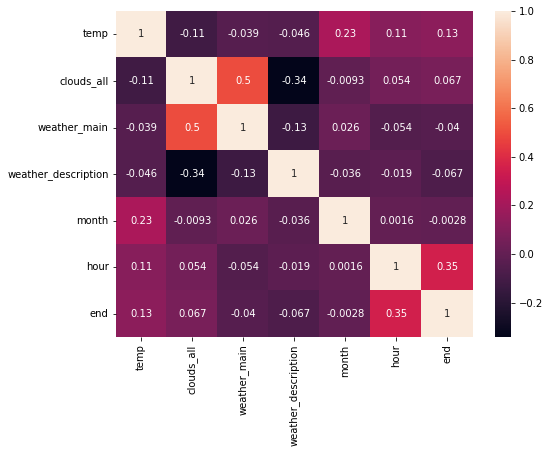

In [ ]:
fig=plt.figure(figsize=(8,6))
sns.heatmap(df_c.corr(), annot = True)
plt.show()

In [ ]:
df_c

In [ ]:
array = df_c.iloc[:,:7].values

In [ ]:
array

array([[ 5.500e-01, -2.400e-01, -5.700e-01, ...,  1.030e+00, -3.500e-01,
         5.545e+03],
       [ 6.400e-01,  6.600e-01, -5.700e-01, ...,  1.030e+00, -2.000e-01,
         4.516e+03],
       [ 6.500e-01,  1.040e+00, -5.700e-01, ...,  1.030e+00, -6.000e-02,
         4.767e+03],
       ...,
       [ 1.200e-01,  1.040e+00,  2.670e+00, ...,  7.300e-01,  1.380e+00,
         2.159e+03],
       [ 6.000e-02,  1.040e+00, -5.700e-01, ...,  7.300e-01,  1.530e+00,
         1.450e+03],
       [ 7.000e-02,  1.040e+00, -5.700e-01, ...,  7.300e-01,  1.670e+00,
         9.540e+02]])

In [ ]:
X=array[:,:6]
Y=array[:,6]

In [ ]:
X

array([[ 0.55, -0.24, -0.57,  0.83,  1.03, -0.35],
       [ 0.64,  0.66, -0.57, -1.62,  1.03, -0.2 ],
       [ 0.65,  1.04, -0.57,  0.27,  1.03, -0.06],
       ...,
       [ 0.12,  1.04,  2.67,  0.5 ,  0.73,  1.38],
       [ 0.06,  1.04, -0.57,  0.27,  0.73,  1.53],
       [ 0.07,  1.04, -0.57,  0.27,  0.73,  1.67]])

In [ ]:
Y

array([5545., 4516., 4767., ..., 2159., 1450.,  954.])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split( X, Y,test_size = 0.3 , random_state = 1 )

In [ ]:
from sklearn.datasets import make_regression
from sklearn.linear_model import Ridge
from sklearn.linear_model import ridge_regression

In [ ]:
model = Ridge(alpha=0.1)  # alpha — величина регуляризации

In [ ]:
model.fit(X_train, Y_train)

Ridge(alpha=0.1)

In [ ]:
X_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [ ]:
RMSE =mean_squared_error(Y_test, X_pred)**(1/2)
RMSE # похоже, что точная

1846.1183489898478

In [ ]:
Y_test.shape, X_pred.shape

((14462,), (14462,))

In [ ]:
r2_score(Y_test, X_pred)

0.1478119308927851

In [ ]:
import matplotlib.pyplot as plt

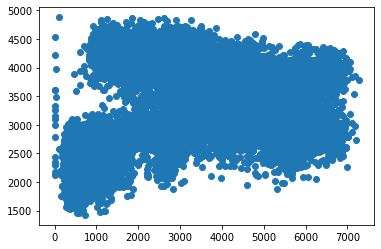

In [ ]:
plt.scatter(Y_test, X_pred)

________________________________________________________________________

# **Эластичная сеть**

In [ ]:
model=ElasticNet()

In [ ]:
results=cross_val_score(model, X, Y, cv=kfold, scoring=scoring)

In [ ]:
results.mean() # чем меньше, тем лучше

-3448324.225586146

In [ ]:
results.std() # чем меньше, тем лучше

43364.46452142037

# **ЗАДАНИЕ 11. НЕЛИНЕЙНЫЕ МОДЕЛИ ДЛЯ РЕГРЕССИИ. ВЫБОР ЛУЧШЕЙ МОДЕЛИ ДЛЯ РЕГРЕССИИ. ПОСТРОЕНИЕ ПРОГРАММНОГО КОНВЕЕРА**

Постройте нелинейные модели для регрессии (модель ближайшего соседа, модель решающего дерева, модель опорных векторов), оцените их качество, сравните с линейными моделями, выберите лучшую модель. Создайте программный конвеер для подготовки данных и моделирования, а также программный конвеер для отбора признаков и моделирования. Оцените целесообразность создания программного конвеера.
Постарайтесь максимально автоматизировать все вычисления, использовать существующие модули среды программирования Python.


**1. Укажите путь к рабочей папке, где хранятся данные, с помощью функции chdir() из модуля os.**

**2. Загрузите данные файла housing.csv с помощью функции read_csv(filename, delim_whitespace=True, names=names) из модуля pandas. Названия столбцов укажите следующими: names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO','B', 'LSTAT', 'MEDV']. Посмотрите на первые 5 наблюдений с помощью функции head().**

In [ ]:
import os
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from matplotlib import pyplot
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest

In [ ]:
os.chdir('/content/gdrive/MyDrive/Colab Notebooks/PDA-200')

In [ ]:
dataframe=read_csv('housing.csv', delim_whitespace=True, names=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO','B', 'LSTAT', 'MEDV'])
dataframe.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


**3. Сохраните в переменную array значения признаков, обратившись к атрибуту values.**

**4. Выделите в переменной array часть, которая относится к факторным признакам, назовите ее X, и часть, которая относится к результативному признаку, - Y. Прокомментируйте содержимое переменных X и Y.**

In [ ]:
array = dataframe.values

In [ ]:
X=array[:,0:13]
Y=array[:,13]

**5. Задайте разбиение на фолды с помощью функции KFold(n_splits = n_splits, random_state = random_state, shuffle = True) из модуля sklearn.model_selection. Результат запишите в переменную kfold. На вход данной функции подайте следующую информацию: 1) количество частей, на которые должна разбиваться выборка (n_splits), - пусть 10; 2) счетчик случайных чисел (random_state) – пусть 7; 3) необходимость перемешивания данных выборки, задав параметр shuffle=True.**

**6. В переменную scoring запишите название метрики качества, которую Вы будете использовать для оценки качества моделей. Пусть это будет средняя квадратичная оценка, взятая с отрицательным знаком, - 'neg_mean_squared_error'.**

**7. Постройте модель ближайшего соседа, воспользовавшись функцией KNeighborsRegressor() из модуля sklearn.neighbors. Результат запишите в переменную model.**

**8. Проведите кросс-валидацию, воспользовавшись функцией cross_val_score(model, X, Y, cv=kfold, scoring=scoring) из модуля sklearn.model_selection. Результат запишите в переменную results.**

**9. Выведите на экран среднюю величину средней квадратичной ошибки (MSE), взятую с отрицательным знаком, и стандартное отклонение полученных оценок, воспользовавшись, соответственно, функциями mean() и std(). Прокомментируйте полученный результат.**

In [ ]:
kfold=KFold(n_splits= 10, random_state = 7, shuffle=True)

In [ ]:
scoring = 'neg_mean_squared_error'

In [ ]:
model=KNeighborsRegressor()

In [ ]:
results=cross_val_score(model, X, Y, cv=kfold, scoring=scoring)

In [ ]:
results.mean()

-38.852320266666666

In [ ]:
results.std()

14.660692658624528

**10. Постройте модель решающего дерева, воспользовавшись функцией DecisionTreeRegressor() из модуля sklearn.tree. Результат запишите в переменную model.**

**11. Проведите кросс-валидацию, воспользовавшись функцией cross_val_score(model, X, Y, cv=kfold, scoring=scoring) из модуля sklearn.model_selection. Результат запишите в переменную results.**

**12. Выведите на экран среднюю величину средней квадратичной ошибки (MSE), взятую с отрицательным знаком, и стандартное отклонение полученных оценок, воспользовавшись, соответственно, функциями mean() и std(). Прокомментируйте полученный результат.**

In [ ]:
model=DecisionTreeRegressor()

In [ ]:
results=cross_val_score(model, X, Y, cv=kfold, scoring=scoring)

In [ ]:
results.mean()

-21.067121960784316

In [ ]:
results.std()

9.44746919014808

**13. Постройте модель опорных векторов, воспользовавшись функцией SVR(gamma='auto') из модуля sklearn.svm. Результат запишите в переменную model.**

**14. Проведите кросс-валидацию, воспользовавшись функцией cross_val_score(model, X, Y, cv=kfold, scoring=scoring) из модуля sklearn.model_selection. Результат запишите в переменную results.**

**15. Выведите на экран среднюю величину средней квадратичной ошибки (MSE), взятую с отрицательным знаком, и стандартное отклонение полученных оценок, воспользовавшись, соответственно, функциями mean() и std(). Прокомментируйте полученный результат.**

In [ ]:
model=SVR(gamma='auto')

In [ ]:
results=cross_val_score(model, X, Y, cv=kfold, scoring=scoring)

In [ ]:
results.mean()

-83.73272794073159

In [ ]:
results.std()

26.79488794617123

# **Раздел 2. Выбор лучшего алгоритма машинного обучения для задачи регрессии**

16. Создайте пустой список и запишите его в переменную models.

**17. Добавьте с помощью функции append() в список models набор из кортежей, первый элемент которого содержит название модели, а второй – функцию для создания соответствующей модели. Включите все линейные и нелинейные модели для регрессии, рассмотренные в заданиях 10 и 11. Можно при этом воспользоваться следующими сокращениями:**

- LinRegr – стандартная линейная регрессия – LinearRegression().

- Ridge – гребневая регрессия – Ridge().

- Lasso – лассо регрессия – Lasso().

- ElasticNet – эластичная сеть – ElasticNet().

- KNN – модель ближайшего соседа – KNeighborsRegressor().

- DTree – модель решающего дерева – DecisionTreeRegressor().

- SVM – метод опорных векторов – SVR().

**18. Создайте пустые списки results и names.**

**19. Задайте критерий оценки качества моделей регрессии в переменной scoring. Пусть – средняя квадратичная оценка, взятая с отрицательным знаком, - 'neg_mean_squared_error'.**

**20. С помощью функции for, обращаясь к имени и объекту модели, которые содержатся в кортежах списка models, выполните следующее:**

**a. Задайте разбиение выборки на фолды с помощью функции KFold(n_splits=10, random_state=7, shuffle=True). Результат запишите в переменную kfold.**

**b. Проведите кросс-валидацию, воспользовавшись функцией cross_val_score(model, X, Y, cv=kfold, scoring=scoring). Результат запишите в переменную cv_results.**

**c. Добавьте полученные результаты (cv_results) в список results, воспользовавшись функцией append().**

**d. Добавьте в список names имя рассмотренной модели, воспользовавшись функцией append().**

**e. С помощью функции print() выведите на экран список названий моделей с соответствующими значениями средней квадратичной оценки, взятой с отрицательным знаком (функция mean()), и стандартного отклонения (функция std()), рассчитанными на кросс-валидации.**

In [ ]:
models=[]

In [ ]:
models.append(('LinRegr',LinearRegression()))

In [ ]:
models.append(('Ridge',Ridge()))

In [ ]:
models.append(('Lasso',Lasso()))

In [ ]:
models.append(('ElasticNet',ElasticNet()))

In [ ]:
models.append(('KNN',KNeighborsRegressor()))

In [ ]:
models.append(('DTree',DecisionTreeRegressor()))

In [ ]:
models.append(('SVM',SVR()))

In [ ]:
models

[('Ridge', Ridge()),
 ('LinRegr', LinearRegression()),
 ('Lasso', Lasso()),
 ('ElasticNet', ElasticNet()),
 ('KNN', KNeighborsRegressor()),
 ('DTree', DecisionTreeRegressor()),
 ('SVM', SVR())]

In [ ]:
results =[]
names=[]

In [ ]:
scoring='neg_mean_squared_error'

**21. Изобразите результаты предыдущих расчетов в виде ящика с усами, воспользовавшись следующими функциями из модуля matplotlib.pyplot: figure(), suptitle(), add_subplot(111), boxplot(), set_xticklabels(), show().**

**22. Выберите лучшую модель. Обоснуйте свой выбор.**

In [ ]:
for name, model in models:
  kfold=KFold(n_splits=10, random_state=7, shuffle=True)
  cv_results=cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  print(name,cv_results.mean(),cv_results.std())

Ridge -23.88989018505344 11.407334196736706
LinRegr -23.746501811313365 11.143430110698096
Lasso -28.74589007585154 12.001844539883205
ElasticNet -27.908420360231055 11.484450217983516
KNN -38.852320266666666 14.660692658624528
DTree -21.934539607843135 9.635008579404511
SVM -67.64140705473743 26.524654546583477


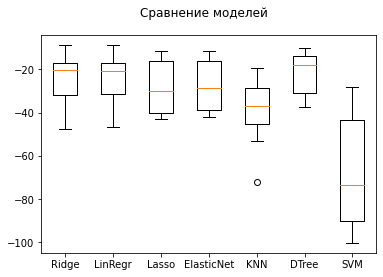

In [ ]:
fig=pyplot.figure()
fig.suptitle('Сравнение моделей')
ax=fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

# **Раздел 3. Создание пайплайна (программного конвеера) для подготовки данных и моделирования**

**23. Создайте пустой список в переменной estimators.**

**24. Добавьте в него кортеж, в котором содержится название операции подготовки данных, пусть стандартизация ('standardize'), и соответствующая функция StandardScaler() из модуля sklearn.preprocessing.**

**25. Также добавьте в список кортеж с названием лучшей модели для регрессии, выбранной в п. 20, и соответствующую ей функцию.**

**26. На основе созданного списка создайте программный конвеер с помощью функции Pipeline() из модуля sklearn.pipeline. Результат запишите в переменную model.**

**27. Задайте разбиение на фолды с помощью функции KFold(n_splits = n_splits, random_state = random_state, shuffle = True) из модуля sklearn.model_selection. Результат запишите в переменную kfold. На вход данной функции подайте следующую информацию: 1) количество частей, на которые должна разбиваться выборка (n_splits), - пусть 10; 2) счетчик случайных чисел (random_state) – пусть 7; 3) необходимость перемешивания данных выборки, задав параметр shuffle=True.**

**28. Проведите кросс-валидацию, воспользовавшись функцией cross_val_score(model, X, Y, cv=kfold, scoring=scoring) из модуля sklearn.model_selection. На вход подайте созданный программный конвеер. Результат запишите в переменную results.**

**29. Выведите на экран среднюю величину средней квадратичной ошибки (MSE), взятую с отрицательным знаком, и стандартное отклонение полученных оценок, воспользовавшись, соответственно, функциями mean() и std(). Прокомментируйте полученный результат.**

In [ ]:
# стандартизация данных, а потом разбивка плохо сказываются на модели, конвеер позволяеи избежать утечки стандартизируя
# данные после разбивки

In [ ]:
estimators=[]

In [ ]:
estimators.append(('standardize',StandardScaler())) # функция выполняющая стандартизацию

In [ ]:
estimators.append(('DTree',DecisionTreeRegressor()))

In [ ]:
# т.е. сначала стандартизируем данные обучающей выборки, потом обучит, затем стандартизирует данные на контрольной выборке,
# а потом проверит

In [ ]:
model=Pipeline(estimators)

In [ ]:
kfold=KFold(n_splits = 10, random_state = 7, shuffle = True)

In [ ]:
results=cross_val_score(model, X, Y, cv=kfold, scoring=scoring)

In [ ]:
results.mean()

-21.112361960784316

In [ ]:
results.std()

9.698027772659461

**30. Сделайте вывод о целесообразности создания программного конвеера.**

Дерево решений без конвеера имеет значение -21.9, а в конвеере -21.1, т.е. в конвеере результат улучшился

# **Раздел 4. Создание пайплайна (программного конвеера) для отбора признаков и моделирования**

**31. Создайте пустой список в переменной features. В нем в дальнейшем будут содержаться отобранные признаки.**

**32. С помощью функции append() добавьте в него кортеж, в котором содержится название метода главных компонент ('pca') и соответствующая функция PCA(n_components=4) из модуля sklearn.decomposition.**

**33. Также добавьте в список кортеж с названием 'select_best' и соответствующую ей функцию SelectKBest(k=6) из модуля sklearn.feature_selection для отбора 6 лучших признаков.**

**34. На основе созданного списка создайте программный конвеер для отбора признаков с помощью функции FeatureUnion() из модуля sklearn.pipeline. Результат запишите в переменную feature_union.**

**35. Создайте пустой список в переменной estimators.**

**36. С помощью функции append() добавьте в него кортеж, в котором содержится название 'feature_union' и созданный ранее конвеер для отбора признаков.**

**37. Также добавьте в список кортеж с названием линейной регрессии ('LinRegr') и соответствующую ей функцию LinearRegression().**

**38. На основе созданного списка создайте программный конвеер с помощью функции Pipeline() из модуля sklearn.pipeline. Результат запишите в переменную model.**

**39. Задайте разбиение на фолды с помощью функции KFold(n_splits = n_splits, random_state = random_state, shuffle = True) из модуля sklearn.model_selection. Результат запишите в переменную kfold. На вход данной функции подайте следующую информацию: 1) количество частей, на которые должна разбиваться выборка (n_splits), - пусть 10; 2) счетчик случайных чисел (random_state) – пусть 7; 3) необходимость перемешивания данных выборки, задав параметр shuffle = True.**

**40. Проведите кросс-валидацию, воспользовавшись функцией cross_val_score(model, X, Y, cv = kfold, scoring = scoring)  из модуля sklearn.model_selection. На вход подайте созданный программный конвеер. Результат запишите в переменную results.**

**41. Выведите на экран среднюю величину средней квадратичной ошибки (MSE), взятую с отрицательным знаком, и стандартное отклонение полученных оценок, воспользовавшись, соответственно, функциями mean() и std(). Прокомментируйте полученный результат.**

**42. Сделайте вывод о целесообразности создания программного **

In [ ]:
features=[]

In [ ]:
features.append(('pca',PCA(n_components=4)))
# добавляем метод главных компонентов, который сжимает пространство признаков до = 4.

In [ ]:
features.append(('select_best',SelectKBest(k=6)))
# отбирает на основе статистических процедур 6 лучших признаков

**выше добавили методы отбора признаков для исключения утечки данных**

In [ ]:
feature_union=FeatureUnion(features)

In [ ]:
estimators=[]

In [ ]:
estimators.append(('feature_union',feature_union))

In [ ]:
estimators.append(('LinRegr',LinearRegression()))

In [ ]:
model=Pipeline(estimators)

In [ ]:
kfold=KFold(n_splits = 10, random_state = 7, shuffle = True)

In [ ]:
results=cross_val_score(model, X, Y, cv = kfold, scoring = scoring)

In [ ]:
results.mean()

-29.052082888799056

In [ ]:
results.std()

12.930344160014172